In [1]:
!pip install statsmodels --upgrade

In [2]:
!pip install AutoReg

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
series=pd.read_excel("/content/palit.xlsx")

In [5]:
series.head()

,event_date,price_palit
0,2021-01-08,466.52
1,2021-01-30,486.81
2,2021-01-12,466.52
3,2021-01-12,466.52
4,2021-01-23,171.90


In [6]:
series["event_date"]=pd.to_datetime(series["event_date"])

In [7]:
series.head()

,event_date,price_palit
0,2021-01-08,466.52
1,2021-01-30,486.81
2,2021-01-12,466.52
3,2021-01-12,466.52
4,2021-01-23,171.90


In [8]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event_date   1077 non-null   datetime64[ns]
 1   price_palit  1077 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.0 KB


In [9]:
series.shape

(1077, 2)

In [10]:
new_series=series.groupby("event_date").sum()

In [11]:
new_series.shape

(129, 1)

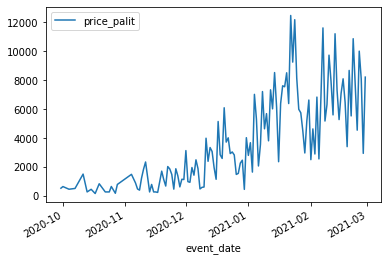

In [12]:
new_series.plot()

In [13]:
series.isnull().sum()

event_date     0
price_palit    0
dtype: int64

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adfuller_test(purchase):
    result=adfuller(purchase)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(new_series["price_palit"])

ADF Test Statistic : -1.5402087664028006
p-value : 0.513535239113196
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
new_series["palit_log"]=np.log(new_series["price_palit"])

In [18]:
adfuller_test(new_series["palit_log"])

ADF Test Statistic : -1.3585626165494198
p-value : 0.6019727373994654
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
palit_diff=new_series["palit_log"].diff()

In [20]:
palit_diff=palit_diff.dropna()

In [21]:
adfuller_test(palit_diff)

ADF Test Statistic : -7.423385253862468
p-value : 6.645407000823878e-11
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


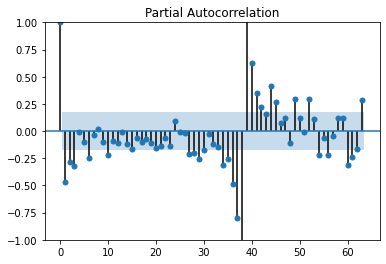

In [23]:
pacf_plot = plot_pacf(palit_diff,lags=63)
# AR 2

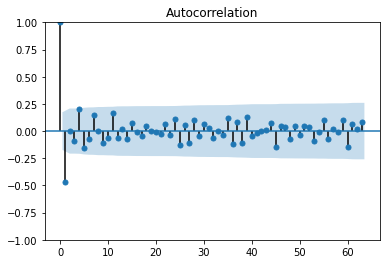

In [24]:
acf_plot = plot_acf(palit_diff, lags = 63)

In [25]:
import statsmodels.api as sm


In [26]:
palit_diff.head()

event_date
2020-10-01    0.196847
2020-10-04   -0.345371
2020-10-07    0.113690
2020-10-11    1.093904
2020-10-13   -1.752216
Name: palit_log, dtype: float64

In [27]:
model1 = sm.tsa.arima.ARIMA(new_series["price_palit"], order=(0,1,1))
result1 = model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            price_palit   No. Observations:                  129
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1148.379
Date:                Thu, 12 May 2022   AIC                           2300.759
Time:                        06:45:59   BIC                           2306.463
Sample:                             0   HQIC                          2303.077
                                - 129                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7401      0.059    -12.575      0.000      -0.855      -0.625
sigma2      3.622e+06   3.57e+05     10.155      0.000    2.92e+06    4.32e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                10.07
Prob(Q):                              0.55   Prob(JB):                         0.01
Heteroskedasticity (H):              16.27   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
forecast_1=result1.predict(start=102,end=127,dynamic=True)


In [30]:
forecast_1

event_date
2021-02-02    5023.283317
2021-02-03    5023.283317
2021-02-04    5023.283317
2021-02-05    5023.283317
2021-02-06    5023.283317
2021-02-07    5023.283317
2021-02-08    5023.283317
2021-02-09    5023.283317
2021-02-10    5023.283317
2021-02-11    5023.283317
2021-02-12    5023.283317
2021-02-13    5023.283317
2021-02-14    5023.283317
2021-02-15    5023.283317
2021-02-16    5023.283317
2021-02-17    5023.283317
2021-02-18    5023.283317
2021-02-19    5023.283317
2021-02-20    5023.283317
2021-02-21    5023.283317
2021-02-22    5023.283317
2021-02-23    5023.283317
2021-02-24    5023.283317
2021-02-25    5023.283317
2021-02-26    5023.283317
2021-02-27    5023.283317
Name: predicted_mean, dtype: float64

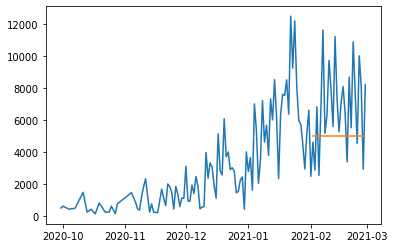

In [32]:
plt.plot(new_series["price_palit"])
plt.plot(forecast_1)
plt.show()

In [33]:
model2=sm.tsa.statespace.SARIMAX(new_series["price_palit"],order=(0, 1, 1),seasonal_order=(0,1,1,31))
results2=model2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [34]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        price_palit   No. Observations:                  129
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 31)   Log Likelihood                -882.736
Date:                            Thu, 12 May 2022   AIC                           1771.473
Time:                                    06:46:49   BIC                           1779.197
Sample:                                         0   HQIC                          1774.596
                                            - 129                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8050      0.062    -12.956      0.000      -0.927      -0.683
ma.S.L31      -0.9027      0.155     -5.826      0.000      -1.206      -0.599
sigma2      3.709e+06   4.65e-08   7.98e+13      0.000    3.71e+06    3.71e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.77   Prob(JB):                         0.41
Heteroskedasticity (H):               6.06   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
forecast_2=results2.predict(start=112,end=127,dynamic=True)


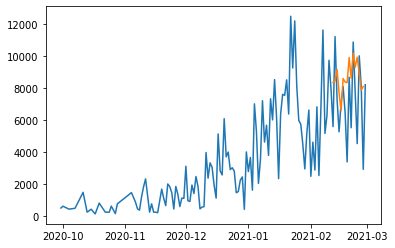

In [39]:
plt.plot(new_series["price_palit"])
plt.plot(forecast_2)
plt.show()

In [40]:
forecast_2

event_date
2021-02-12     8358.660393
2021-02-13     8444.557787
2021-02-14     9162.324469
2021-02-15     7692.190278
2021-02-16     6601.522757
2021-02-17     8599.449990
2021-02-18     8382.559048
2021-02-19     8340.700569
2021-02-20     9911.178093
2021-02-21     8614.187581
2021-02-22    10182.892427
2021-02-23     9311.507301
2021-02-24     9929.603953
2021-02-25     8914.523803
2021-02-26     7879.325365
2021-02-27     8101.770215
Name: predicted_mean, dtype: float64

In [44]:
y

event_date
2021-02-17     8096.81
2021-02-18     6456.05
2021-02-19     3395.84
2021-02-20     8678.54
2021-02-21     5526.14
2021-02-22    10875.97
2021-02-23     7668.46
2021-02-24     4538.37
2021-02-25    10014.01
2021-02-26     8077.30
Name: price_palit, dtype: float64

In [51]:
y=new_series.price_palit[112:128]

In [52]:
residuals=forecast_2-y

In [53]:
residuals

event_date
2021-02-12    2761.290393
2021-02-13   -2774.572213
2021-02-14    1862.424469
2021-02-15    2420.740278
2021-02-16    -490.437243
2021-02-17     502.639990
2021-02-18    1926.509048
2021-02-19    4944.860569
2021-02-20    1232.638093
2021-02-21    3088.047581
2021-02-22    -693.077573
2021-02-23    1643.047301
2021-02-24    5391.233953
2021-02-25   -1099.486197
2021-02-26    -197.974635
2021-02-27    5170.180215
dtype: float64

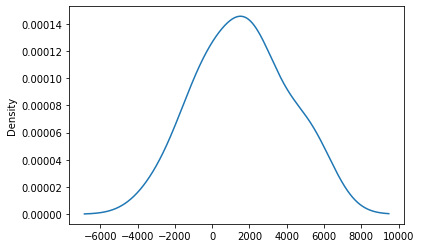

In [54]:
residuals.plot(kind='kde')
plt.show()

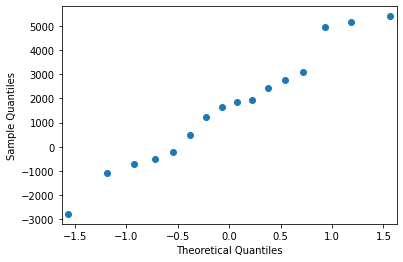

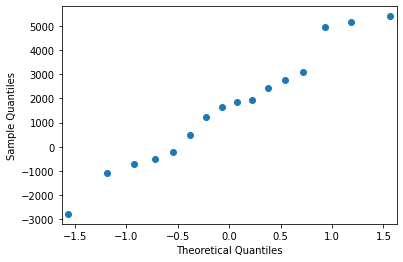

In [55]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals)

In [56]:
RSS=sum(residuals**2)

In [61]:
TSS=new_series["price_palit"]-new_series["price_palit"].mean()

In [62]:
TSS_Squared=sum(TSS**2)

In [63]:
r_squared= 1-(RSS/TSS_Squared)

In [64]:
r_squared

0.9005393004010969

In [65]:
y=palit_diff[112:128]

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y, forecast_2))
print(rms)

8697.256012557646


In [67]:
from scipy.stats import shapiro

In [68]:
shapiro(residuals)

(0.9659900069236755, 0.7702203392982483)